# 3.1 Age Income

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import csv

In [2]:
data = pd.read_csv('Age_Income.csv')

In [3]:
data

,Age,Income
0,Young,25000
1,Middle Age,54000
2,Old,60000
3,Young,15000
4,Young,45000
5,Young,65000
6,Young,70000
7,Young,30000
8,Middle Age,27000
9,Young,23000


In [25]:
summary_stats = data.groupby('Age')['Income'].describe()
print(summary_stats)

            count          mean           std      min      25%      50%  \
Age                                                                        
Middle Age   15.0  52453.333333  20497.800114  25600.0  36900.0  53200.0   
Old          19.0  53942.105263  20868.165968  24500.0  38700.0  45300.0   
Young        16.0  46037.500000  22356.859499  15000.0  28750.0  41500.0   

                75%      max  
Age                           
Middle Age  61200.0  93000.0  
Old         71400.0  89700.0  
Young       65850.0  87000.0  


In [29]:
age_numeric_encoding = {
    'Young': 1,
    'Middle Age': 2,
    'Old': 3
}

data['Age_numeric'] = data['Age'].map(age_numeric_encoding)

# Mean

In [6]:
income_np = np.array(data['Income'])
income_df = pd.Series(data['Income'])

In [7]:
#Formula
mean_income = sum(data['Income'])/len(data['Income'])
print(mean_income)

#statistics library function
mean_income=statistics.mean(data['Income'])
print(mean_income)

#  Using NumPy function
mean_income = np.mean(income_np)
print(mean_income)

#Using Pandas function
mean_income = income_df.mean()
print(mean_income)

50966.0
50966
50966.0
50966.0


# Median

In [5]:
#formula
n = len(data['Income'])
if n % 2:
    median_income = sorted(data['Income'])[round(0.5*(n-1))]
else:
    x_ord, index = sorted(data['Income']), round(0.5 * n)
    median_income = 0.5 * (x_ord[index-1] + x_ord[index])

print(median_income)

46850.0


In [9]:
# Using Statistics Library function
median_income = statistics.median(data['Income'])
print(median_income)

# Using NumPy function
median_income = np.median(income_np)
print(median_income)

# Using Pandas function
median_income = income_df.median()
print(median_income)

46850.0
46850.0
46850.0


# Mode

In [19]:
# Finding the mode without any library
income_counts = {}
for item in data['Income']:
    if item in income_counts:
        income_counts[item] += 1
    else:
        income_counts[item] = 1

mode_income = max(income_counts, key=income_counts.get)
print(mode_income)

# Using Statistics Library function
mode_income = statistics.mode(data['Income'])
print(mode_income)

45000
45000


# Varience

In [21]:
n = len(data['Income'])
income_mean = sum(data['Income']) / n
income_var = sum((item - income_mean)**2 for item in data['Income']) / (n - 1)
print(income_var)

445070044.8979592


In [22]:
# Using Statistics library function
income_var = statistics.variance(data['Income'])
print(income_var)

# Using NumPy library function
income_var = np.var(income_np, ddof=1) #Here the ddof stands for delta degrees of freedom. This parameter allows the proper calculation of 𝑠², with (𝑛 − 1) in the denominator instead of 𝑛.
print(income_var)

# Using Pandas Library function
income_var = income_df.var(ddof=1)
print(income_var)

445070044.8979592
445070044.8979592
445070044.8979592


# Strandard Deviation

In [23]:
# Calculating Variance using Formula (without libraries)
income_std = income_var**0.5
print(income_std)

21096.683267707253


In [24]:
# Using Statistics library function
income_std = statistics.stdev(data['Income'])
print(income_std)

# Using NumPy library function
income_std = np.std(income_np, ddof=1) #Here the ddof stands for delta degrees of freedom. This parameter allows the proper calculation of 𝑠², with (𝑛 − 1) in the denominator instead of 𝑛.
print(income_std)

# Using Pandas Library function
income_std = income_df.std(ddof=1)
print(income_std)

21096.683267707253
21096.683267707253
21096.683267707253


# Skewness

In [26]:
# Calculating Skewness using formula (without libraries)
n = len(data['Income'])
income_mean = sum(data['Income']) / n
income_var = sum((item - income_mean)**2 for item in data['Income']) / (n - 1)
income_std = income_var ** 0.5
income_skew = (sum((item - income_mean)**3 for item in data['Income'])* n / ((n - 1) * (n - 2) * income_std**3))
print(income_skew)

0.3896340114677523


In [27]:
# Using Scipy library function
income_skew=scipy.stats.skew(income_np, bias=False) #Here the parameter bias is set to False to enable the corrections for statistical bias.
print(income_skew)
# Using Pandas Library function
income_df.skew()
print(income_skew)

0.3896340114677522
0.3896340114677522


This distribution has skew 0.38963401146775223
This distribution has kurtosis -0.8429291874944673


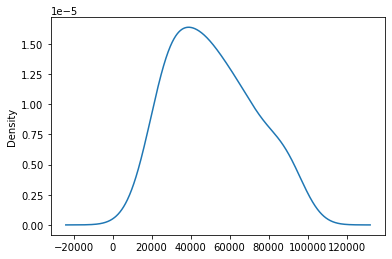

In [28]:
norm = income_df
norm.plot(kind = 'density')
print('This distribution has skew', norm.skew())
print('This distribution has kurtosis', norm.kurt())

# ---------------------------------------------------------------------------------------------------------

# 3.2 Iris

In [32]:
iris = pd.read_csv('Iris.csv')

In [33]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
# Function to calculate mean
def calculate_mean(data):
    return sum(data) / len(data)

In [36]:
# Function to calculate mode
def calculate_mode(data):
    frequency_dict = {}
    for value in data:
        frequency_dict[value] = frequency_dict.get(value, 0) + 1
    mode_frequency = max(frequency_dict.values())
    mode = [key for key, value in frequency_dict.items() if value == mode_frequency]
    return mode

In [37]:
# Function to calculate median
def calculate_median(data):
    sorted_data = sorted(data)
    n = len(data)
    if n % 2 == 0:
        return (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2
    else:
        return sorted_data[n // 2]

In [38]:
# Function to calculate variance
def calculate_variance(data):
    mean = calculate_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    return variance

In [39]:
# Function to calculate standard deviation
def calculate_standard_deviation(data):
    variance = calculate_variance(data)
    return variance ** 0.5

In [40]:
# Function to calculate skewness
def calculate_skewness(data):
    mean = calculate_mean(data)
    std_dev = calculate_standard_deviation(data)
    skewness = sum((x - mean) ** 3 for x in data) / (len(data) * std_dev ** 3)
    return skewness

In [44]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [45]:
# Define a function to calculate statistics for a given column
def calculate_statistics(data):
    mean = calculate_mean(data)
    mode = calculate_mode(data)
    median = calculate_median(data)
    variance = calculate_variance(data)
    std_dev = calculate_standard_deviation(data)
    skewness = calculate_skewness(data)
    return mean, mode, median, variance, std_dev, skewness

# Filter the dataset for 'Iris-setosa' and 'Iris-versicolor'
filtered_data = iris[(iris['Species'] == 'Iris-setosa') | (iris['Species'] == 'Iris-versicolor')]

# Get data for each column except 'Id' and 'Species'
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for column in columns:
    column_data = filtered_data[column].tolist()
    mean, mode, median, variance, std_dev, skewness = calculate_statistics(column_data)
    print(f"Statistics for {column}:", "\nMean:", mean, "\nMode:", mode, "\nMedian:", median, "\nVariance:", variance, "\nStandard Deviation:", std_dev, "\nSkewness:", skewness, "\n")


Statistics for SepalLengthCm: 
Mean: 5.471000000000003 
Mode: [5.0] 
Median: 5.4 
Variance: 0.4076590000000003 
Standard Deviation: 0.6384817930058776 
Skewness: 0.40909619018225835 

Statistics for SepalWidthCm: 
Mean: 3.0940000000000003 
Mode: [3.0] 
Median: 3.05 
Variance: 0.22436399999999992 
Standard Deviation: 0.4736707717391901 
Skewness: 0.18592170815729164 

Statistics for PetalLengthCm: 
Mean: 2.8620000000000005 
Mode: [1.5] 
Median: 2.45 
Variance: 2.0773560000000004 
Standard Deviation: 1.4413035766277695 
Skewness: 0.12106922928291142 

Statistics for PetalWidthCm: 
Mean: 0.7849999999999998 
Mode: [0.2] 
Median: 0.8 
Variance: 0.31747500000000006 
Standard Deviation: 0.5634491991297885 
Skewness: 0.1260041348921774 

